In [1]:
import os
import pandas as pd
import numpy as np
import scipy
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

In [2]:
#define directories
cwd = os.getcwd()
pathout = cwd + "/output"
if not os.path.exists(pathout):
    os.mkdir(pathout)

In [3]:
#load data
dfRNAseq = pd.read_csv('forPCA.tcga.brca.rsem.csv', low_memory=False)

RNAsampletype = dfRNAseq['sample_type']
dfRNAseq.drop(['sample_type'], axis=1, inplace=True)

Typically it is necessary to log transform normalized counts before clustering.

In [4]:
#log2 transformation of RSEM normalized counts
dfnormRNAseq = pd.DataFrame()
epsilon = 0.000001

for index, row in dfRNAseq.iterrows():
    logarray = []
    for value in row:
        value = value + epsilon
        logvalue = np.log2(value)
        logarray = np.append(logarray, logvalue)
    tempseries = pd.Series(logarray, name = index)
    dfnormRNAseq = pd.concat([dfnormRNAseq, tempseries], axis=1, ignore_index=True)

#format and save log2 transformed data
header = list(dfRNAseq.head(0))

dfnormRNAseq2 = dfnormRNAseq.T
dfnormRNAseq2.columns = header
dfnormRNAseq2 = dfnormRNAseq2.set_index([pd.Series(RNAsampletype)])

#dfnormRNAseq2 = dfnormRNAseq2.assign(sample_type=lambda x: list(RNAsampletype))
filename = pathout + '/log2data.txt'
dfnormRNAseq2.to_csv(filename, sep='\t', index=True, header=True)

                     A1BG       A1CF      A2BP1     A2LD1     A2ML1  \
sample_type                                                           
Adjacent Normal  7.271211  -0.655396  -0.655396  6.901844  4.072569   
Adjacent Normal  6.772788 -19.931569   1.911193  6.806967  4.289694   
Adjacent Normal  3.980400 -19.931569  -0.973693  6.721155  4.518057   
Adjacent Normal  4.253399 -19.931569 -19.931569  7.262724  3.291869   
Adjacent Normal  5.376586 -19.931569  -1.035340  6.939526  1.964658   

                       A2M    A4GALT     A4GNT       AAA1      AAAS  ...  \
sample_type                                                          ...   
Adjacent Normal  15.294844  9.293015  0.929640 -19.931569  9.607330  ...   
Adjacent Normal  14.994129  9.851934 -1.410808  -1.410808  9.672066  ...   
Adjacent Normal  15.448018  9.084197  4.274135 -19.931569  9.218498  ...   
Adjacent Normal  15.353528  9.340860  1.628914 -19.931569  9.122094  ...   
Adjacent Normal  15.627595  8.982852  0.964658

In [5]:
#perform PCA on entire RNA expression dataset
pca = PCA(n_components=2)
components = pca.fit_transform(dfnormRNAseq)

In [6]:
#separate PCA values by sample_type
PCAtypedict = {}
sampletypeset = set(RNAsampletype)

for item in RNAsampletype:
    PCAtypedict[item] = []
count = 0
for item in RNAsampletype:
    PCAtypedict[item].append(components[count])
    count = count + 1

primtumorPCA = PCAtypedict['Primary Tumor']
mettumorPCA = PCAtypedict['Metastasis']
normPCA = PCAtypedict['Adjacent Normal']

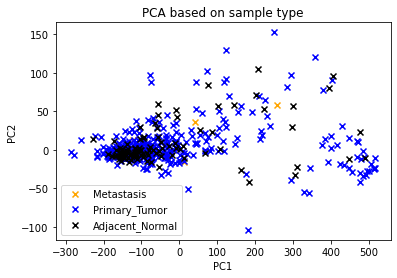

In [7]:
#visualize PCA results
for i in mettumorPCA:
    m = plt.scatter(i[0], i[1], marker='x', color = 'orange')
for i in primtumorPCA:
    pt = plt.scatter(i[0], i[1], marker='x', color = 'blue')
for i in normPCA:
    an = plt.scatter(i[0], i[1], marker='x', color = 'black')
plt.title('PCA based on sample type')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend((m, pt, an), ('Metastasis', 'Primary_Tumor', 'Adjacent_Normal'), loc="best")
plt.show()